In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/Teeth_DataSet.zip /content/


In [3]:
import zipfile

with zipfile.ZipFile('/content/Teeth_DataSet.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Dataset')


In [4]:
!ls /content/Dataset/Teeth_Dataset/Training/


CaS  CoS  Gum  MC  OC  OLP  OT


In [5]:
import os
train_dir='/content/Dataset/Teeth_Dataset/Training'
class_names=os.listdir(train_dir)
val_dir='/content/Dataset/Teeth_Dataset/Validation'
class_names2=os.listdir(val_dir)


In [6]:
print(class_names)

['Gum', 'OLP', 'OT', 'MC', 'CoS', 'CaS', 'OC']


In [7]:
print(class_names2)

['Gum', 'OLP', 'OT', 'MC', 'CoS', 'CaS', 'OC']


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import resnet50


In [9]:
# Declaring variables
x=[] # to store array value of the images
y=[] # to store the labels of the images

for folder in os.listdir(train_dir):
    image_list=os.listdir(train_dir+"/"+folder)
    for img_name in image_list:
        # Loading images

        print(train_dir+"/"+folder+"/"+img_name)

        img=image.load_img(train_dir+"/"+folder+"/"+img_name,target_size=(224,224))

        # Converting to arrary
        img=image.img_to_array(img)

        # Transfer Learning: this is to apply preprocess of resnet to our images before passing it to resnet
        img=resnet50.preprocess_input(img)

        # Appending the arrarys
        x.append(img) # appending image array
        y.append(class_names.index(folder)) # appending class index to the array

/content/Dataset/Teeth_Dataset/Training/Gum/g_1217_0_4420.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1208_0_8671.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1219_0_6555.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1238_0_508.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1247_0_6803.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1236_0_3013.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1228_0_6522.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1225_0_4883.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1210_0_1181.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1220.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1234_0_9329.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1217.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1224_0_8841.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1259_0_5871.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1251_0_9130.jpg
/content/Dataset/Teeth_Dataset/Training/Gum/g_1255_0_8591.jpg
/content/Dataset/Teeth_

In [10]:
x

[array([[[  3.060997 ,  33.221    ,  83.32     ],
         [ -1.939003 ,  28.221    ,  78.32     ],
         [ -7.939003 ,  22.221    ,  72.32     ],
         ...,
         [-38.939003 , -36.779    , -24.68     ],
         [-38.939003 , -36.779    , -24.68     ],
         [-38.939003 , -36.779    , -24.68     ]],
 
        [[  4.060997 ,  34.221    ,  84.32     ],
         [ -0.939003 ,  29.221    ,  79.32     ],
         [ -5.939003 ,  24.221    ,  74.32     ],
         ...,
         [-40.939003 , -38.779    , -26.68     ],
         [-40.939003 , -38.779    , -26.68     ],
         [-40.939003 , -38.779    , -26.68     ]],
 
        [[  5.060997 ,  35.221    ,  85.32     ],
         [  1.060997 ,  31.221    ,  81.32     ],
         [ -2.939003 ,  27.221    ,  77.32     ],
         ...,
         [-42.939003 , -39.779    , -29.68     ],
         [-42.939003 , -39.779    , -29.68     ],
         [-42.939003 , -39.779    , -29.68     ]],
 
        ...,
 
        [[-28.939003 , -16.779    

In [11]:
val_images=[]
val_image_label=[] # to store the labels of the images

for folder in os.listdir(val_dir):
    image_list=os.listdir(val_dir+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(val_dir+"/"+folder+"/"+img_name,target_size=(224,224))

        # Converting to arrarys
        img=image.img_to_array(img)

        # Transfer Learning: this is to apply preprocess of resnet to our images before passing it to resnet
        img=resnet50.preprocess_input(img) #  Optional step
        # Appending arrays
        val_images.append(img) # appending image array
        val_image_label.append(class_names2.index(folder))

In [12]:
val_images

[array([[[ 139.061   ,   55.221   ,  -15.68    ],
         [ 140.061   ,   56.221   ,  -14.68    ],
         [ 142.061   ,   57.221   ,  -13.68    ],
         ...,
         [ -90.939   , -100.779   ,  -69.68    ],
         [ -86.939   ,  -97.779   ,  -63.68    ],
         [ -85.939   ,  -94.779   ,  -60.68    ]],
 
        [[ 144.061   ,   54.221   ,  -14.68    ],
         [ 145.061   ,   55.221   ,  -13.68    ],
         [ 146.061   ,   56.221   ,  -12.68    ],
         ...,
         [ -89.939   , -100.779   ,  -67.68    ],
         [ -85.939   ,  -96.779   ,  -62.68    ],
         [ -85.939   ,  -94.779   ,  -60.68    ]],
 
        [[ 151.061   ,   50.221   ,  -13.68    ],
         [ 151.061   ,   51.221   ,  -12.68    ],
         [ 151.061   ,   52.221   ,  -11.68    ],
         ...,
         [ -88.939   ,  -99.779   ,  -65.68    ],
         [ -85.939   ,  -97.779   ,  -60.68    ],
         [ -84.939   ,  -94.779   ,  -57.68    ]],
 
        ...,
 
        [[  12.060997,   15.221001

In [13]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)


# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images)
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(3087, 224, 224, 3)
(3087, 7)
Validation Dataset
(1028, 224, 224, 3)
(1028, 7)


In [14]:
print("Summary of default ResNet50 model.\n")

# we are using resnet50 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import resnet50

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_resnet=resnet50.ResNet50(weights='imagenet')

# display the summary to see the properties of the model
model_resnet.summary()

Summary of default ResNet50 model.

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [15]:
target_size = (224, 224)
input_layer=layers.Input(shape=(224,224,3))
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [16]:
from tensorflow.keras.preprocessing import image
import os

sample_image_path = '/content/Dataset/Teeth_Dataset/Validation/Gum/g_1201_0_517.jpg'  # change as needed

img = image.load_img(sample_image_path)
print("Image size:", img.size)  # (width, height)


Image size: (256, 256)


In [17]:
print("Summary of Custom ResNet50 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=resnet_model.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer)

# Add dense layer
dense1=layers.Dense(256,activation='relu')(flatten)

# Add dense layer to the final output layer
output_layer=layers.Dense(7,activation='softmax')(dense1)

# Creating modle with input and output layer

model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom ResNet50 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 49,279,879 (187.99 MB)

 Trainable params: 49,226,759 (187.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [18]:
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
# Unfreeze last 30 layers
for layer in model.layers[-20:]:
    layer.trainable = True
model.summary()

We are making all the layers intrainable except the last layer. 



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 49,279,879 (187.99 MB)

 Trainable params: 33,573,383 (128.07 MB)

 Non-trainable params: 15,706,496 (59.92 MB)

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Save the best model during training
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Stop training early if no improvement in validation loss
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Put all callbacks into a list
callbacks = [checkpoint, early_stop, reduce_lr]


In [22]:
model.fit(xtrain,ytrain,epochs=50,batch_size=64,verbose=True,validation_data=(xtest,ytest),callbacks=callbacks)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.4369 - loss: 15.8443
Epoch 1: val_loss improved from inf to 5.36766, saving model to best_model.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.4407 - loss: 15.6121 - val_accuracy: 0.3414 - val_loss: 5.3677 - learning_rate: 0.0010
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9630 - loss: 0.1243
Epoch 2: val_loss improved from 5.36766 to 0.92611, saving model to best_model.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 26s 674ms/step - accuracy: 0.9632 - loss: 0.1238 - val_accuracy: 0.7702 - val_loss: 0.9261 - learning_rate: 0.0010
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.9957 - loss: 0.0329
Epoch 3: val_loss improved from 0.92611 to 0.57802, saving model to best_model.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9957 - loss: 0.0331 - val_accuracy: 0.8430 - val_loss: 0.5780 - learning_rate: 0.0010
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.999

In [23]:
model.evaluate(xtest, ytest)


20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 276ms/step - accuracy: 0.9166 - loss: 0.3079


[0.340025931596756, 0.909385085105896]

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [25]:
# Predict probabilities
y_pred_probs = model.predict(xtest)

# Convert predictions and true labels from one-hot to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(ytest, axis=1)


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step


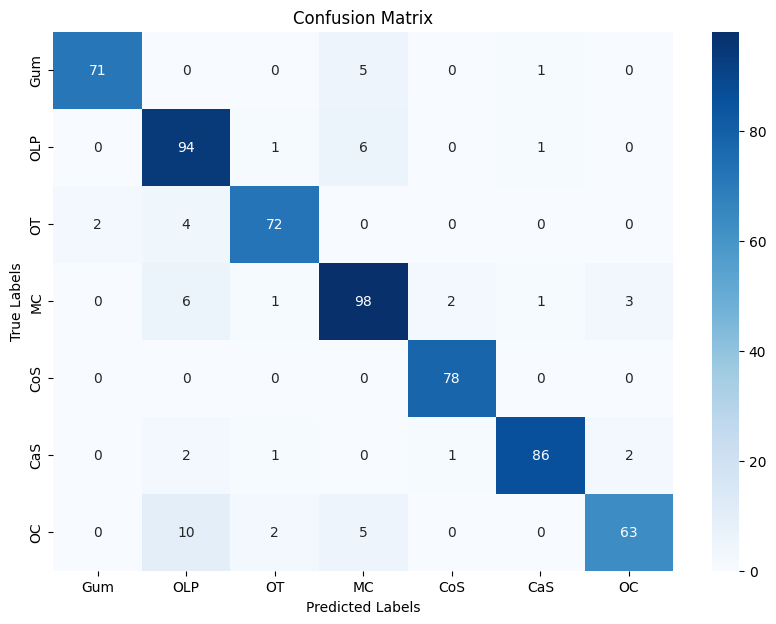

In [26]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.metrics import classification_report, f1_score

# If you haven’t already:
# Convert predictions and true labels from one-hot to class indices
y_pred = np.argmax(model.predict(xtest), axis=1)
y_true = np.argmax(ytest, axis=1)

# Print detailed classification report (includes F1)
print(classification_report(y_true, y_pred, target_names=class_names))


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step
              precision    recall  f1-score   support

         Gum       0.97      0.92      0.95        77
         OLP       0.81      0.92      0.86       102
          OT       0.94      0.92      0.93        78
          MC       0.86      0.88      0.87       111
         CoS       0.96      1.00      0.98        78
         CaS       0.97      0.93      0.95        92
          OC       0.93      0.79      0.85        80

    accuracy                           0.91       618
   macro avg       0.92      0.91      0.91       618
weighted avg       0.91      0.91      0.91       618



In [32]:
model.save("resnet50_model.h5")


In [33]:
from google.colab import files
files.download("resnet50_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
class_names = ['Gum', 'OLP', 'OT', 'MC', 'CoS', 'CaS', 'OC']
with open("labels.txt", "w") as f:
    f.write("\n".join(class_names))

files.download("labels.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
app_code = '''
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

# Load model and labels
model = tf.keras.models.load_model("resnet50_model.h5")
with open("labels.txt", "r") as f:
    labels = [line.strip() for line in f]

# Preprocess function
def preprocess_image(image):
    image = image.resize((224, 224))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Streamlit UI
st.title("ResNet-50 Image Classifier")

uploaded_file = st.file_uploader("Upload an image", type=["png", "jpg", "jpeg"])
if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    img_array = preprocess_image(image)
    predictions = model.predict(img_array)
    predicted_class = labels[np.argmax(predictions)]

    st.success(f"Predicted Class: **{predicted_class}**")
'''
with open("app.py", "w") as f:
    f.write(app_code)

In [38]:
from google.colab import files
files.download("resnet50_model.h5")
# files.download("labels.txt")
# files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>